In [2]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
import os
import env


# Acquire the Data

In [10]:
def get_connection(db: str, user: str = env.user, host: str = env.host, password=env.password) -> str:
    return f"mysql+pymysql://{user}:{password}@{host}/{db}"

def get_zillow_data(file_name="zillow.csv") -> pd.DataFrame:
    if os.path.isfile(file_name):
        return pd.read_csv(file_name)
    query = """select propertylandusedesc, bedroomcnt, 
               bathroomcnt, calculatedfinishedsquarefeet, 
               taxvaluedollarcnt, yearbuilt, taxamount, fips
               from propertylandusetype 
               join properties_2017
               using (propertylandusetypeid)
               where propertylandusedesc = 'Single Family Residential'
            """
    connection = get_connection("zillow")
    df = pd.read_sql(query, connection)
    df.to_csv(file_name, index=False)
    return df

In [11]:
df = get_zillow_data()
df

,propertylandusedesc,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
0,Single Family Residential,0.0,0.0,NaN,27516.0,NaN,NaN,6037.0
1,Single Family Residential,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
2,Single Family Residential,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
3,Single Family Residential,0.0,0.0,NaN,2108.0,NaN,174.21,6037.0
4,Single Family Residential,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0
...,...,...,...,...,...,...,...,...
2152858,Single Family Residential,4.0,3.0,2262.0,960756.0,2015.0,13494.52,6059.0
2152859,Single Family Residential,4.0,4.5,3127.0,536061.0,2014.0,6244.16,6059.0
2152860,Single Family Residential,0.0,0.0,NaN,208057.0,NaN,5783.88,6059.0
2152861,Single Family Residential,3.0,2.5,1974.0,424353.0,2015.0,5302.70,6059.0


# Sample and Summarize

In [12]:
df.sample(5) # gives me 5 random rows from the dataframe 

,propertylandusedesc,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
595836,Single Family Residential,2.0,1.0,1132.0,225204.0,1902.0,2867.60,6037.0
791928,Single Family Residential,3.0,1.0,1014.0,40958.0,1955.0,1157.52,6037.0
1344879,Single Family Residential,3.0,2.5,1672.0,395947.0,1976.0,4179.56,6059.0
1797630,Single Family Residential,4.0,3.0,2428.0,667000.0,2005.0,8973.62,6059.0
1649311,Single Family Residential,4.0,4.0,3072.0,364577.0,1968.0,4743.23,6037.0


In [13]:
df.describe().T # gives me the summary statistics and transpose them for better view

,count,mean,std,min,25%,50%,75%,max
bedroomcnt,2152852.0,3.287196,0.954754,0.00,3.00,3.00,4.00,25.00
bathroomcnt,2152852.0,2.230688,0.999280,0.00,2.00,2.00,3.00,32.00
calculatedfinishedsquarefeet,2144379.0,1862.855178,1222.125124,1.00,1257.00,1623.00,2208.00,952576.00
taxvaluedollarcnt,2152370.0,461896.237963,699676.049600,1.00,188170.25,327671.00,534527.00,98428909.00
yearbuilt,2143526.0,1960.949681,22.162196,1801.00,1949.00,1958.00,1976.00,2016.00
taxamount,2148421.0,5634.865978,8178.910249,1.85,2534.98,4108.95,6414.32,1337755.86
fips,2152863.0,6048.377335,20.433292,6037.00,6037.00,6037.00,6059.00,6111.00


In [14]:
df.shape # shows number of rows and columns respectivly 

(2152863, 8)

In [15]:
df.size # count of elements in the array 

17222904

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2152863 entries, 0 to 2152862
Data columns (total 8 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   propertylandusedesc           object 
 1   bedroomcnt                    float64
 2   bathroomcnt                   float64
 3   calculatedfinishedsquarefeet  float64
 4   taxvaluedollarcnt             float64
 5   yearbuilt                     float64
 6   taxamount                     float64
 7   fips                          float64
dtypes: float64(7), object(1)
memory usage: 131.4+ MB


In [ ]:
# want to change Dtypes for yearbuilt, fips, and bedrooms into ints becasue we cant have decemalts 

In [ ]:
# rename colums for me 

In [17]:
def check_columns(df):
    """
    This function takes a pandas dataframe as input and returns
    a dataframe with information about each column in the dataframe. For
    each column, it returns the column name, the number of
    unique values in the column, the unique values themselves,
    the number of null values in the column, and the data type of the column.
    The resulting dataframe is sorted by the 'Number of Unique Values' column in ascending order.
​
    Args:
    - df_telco: pandas dataframe
​
    Returns:
    - pandas dataframe
    """
    data = []
    # Loop through each column in the dataframe
    for column in df.columns:
        # Append the column name, number of unique values, unique values, number of null values, and data type to the data list
        data.append(
            [
                column,
                df[column].nunique(),
                df[column].unique(),
                df[column].isna().sum(),
                df[column].dtype
            ]
        )
    # Create a pandas dataframe from the data list, with column names 'Column Name', 'Number of Unique Values', 'Unique Values', 'Number of Null Values', and 'dtype'
    # Sort the resulting dataframe by the 'Number of Unique Values' column in ascending order
    return pd.DataFrame(
        data,
        columns=[
            "Column Name",
            "Number of Unique Values",
            "Unique Values",
            "Number of Null Values",
            "dtype"
        ],
    ).sort_values(by="Number of Unique Values")

In [18]:
check_columns(df=df).T

,0,7,1,2,5,3,4,6
Column Name,propertylandusedesc,fips,bedroomcnt,bathroomcnt,yearbuilt,calculatedfinishedsquarefeet,taxvaluedollarcnt,taxamount
Number of Unique Values,1,3,19,38,153,10580,592269,918838
Unique Values,[Single Family Residential],"[6037.0, 6059.0, 6111.0]","[0.0, 4.0, 3.0, 5.0, 2.0, 1.0, 6.0, 7.0, 8.0, ...","[0.0, 2.0, 4.0, 1.0, 2.5, 3.5, 3.0, 5.5, 4.5, ...","[nan, 2005.0, 2011.0, 1926.0, 1972.0, 1973.0, ...","[nan, 3633.0, 1620.0, 2077.0, 1200.0, 171.0, 2...","[27516.0, 10.0, 2108.0, 296425.0, 124.0, 84777...","[nan, 174.21, 6941.39, 10244.94, 7924.68, 8034..."
Number of Null Values,0,0,11,11,9337,8484,493,4442
dtype,object,float64,float64,float64,float64,float64,float64,float64


In [19]:
df.isnull().any()

propertylandusedesc             False
bedroomcnt                       True
bathroomcnt                      True
calculatedfinishedsquarefeet     True
taxvaluedollarcnt                True
yearbuilt                        True
taxamount                        True
fips                            False
dtype: bool

In [48]:
df.isnull().sum()

propertylandusedesc             0
bedroomcnt                      0
bathroomcnt                     0
calculatedfinishedsquarefeet    0
taxvaluedollarcnt               0
yearbuilt                       0
taxamount                       0
fips                            0
dtype: int64

In [21]:
df.calculatedfinishedsquarefeet.count(), df.calculatedfinishedsquarefeet.isnull().sum()

(2144379, 8484)

KeyboardInterrupt: 

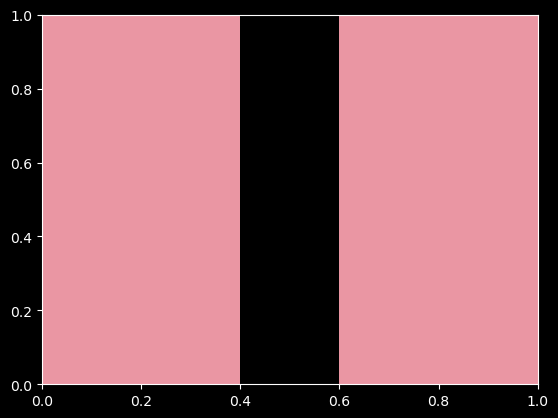

In [22]:
# The default is bins=10.

sns.countplot(x=df.calculatedfinishedsquarefeet, data=df)

plt.title('CFSQfT')
plt.show()

In [23]:
df.calculatedfinishedsquarefeet.mean()

1862.855177652831

In [24]:
df['calculatedfinishedsquarefeet'] = df['calculatedfinishedsquarefeet'].fillna(df.calculatedfinishedsquarefeet.mean())
df.isnull().sum()

propertylandusedesc                0
bedroomcnt                        11
bathroomcnt                       11
calculatedfinishedsquarefeet       0
taxvaluedollarcnt                493
yearbuilt                       9337
taxamount                       4442
fips                               0
dtype: int64

### for calculated finished square feet I will be fill the null values with the mean value. Because it looks to me there it somthing apparixomating a normal distrobution   

In [25]:
df.yearbuilt.count(), df.yearbuilt.isnull().sum()

(2143526, 9337)

Text(0.5, 1.0, 'Year Built')

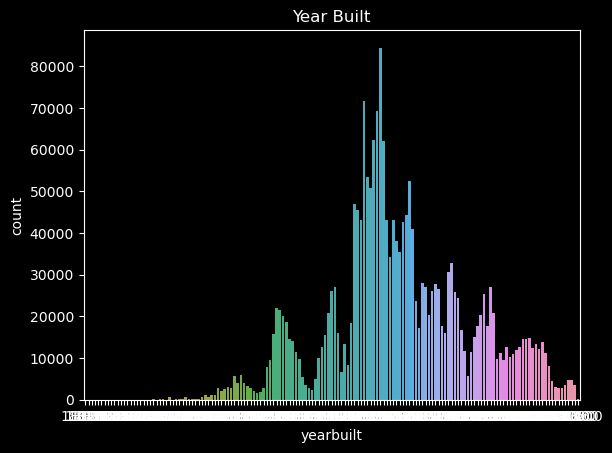

In [24]:
sns.countplot(data=df, x=df.yearbuilt)
plt.title("Year Built")

In [26]:
df['yearbuilt'] = df['yearbuilt'].fillna(df.yearbuilt.mean())
df.isnull().sum()

propertylandusedesc                0
bedroomcnt                        11
bathroomcnt                       11
calculatedfinishedsquarefeet       0
taxvaluedollarcnt                493
yearbuilt                          0
taxamount                       4442
fips                               0
dtype: int64

### for year built  I will fill na with the mean of year built because the graph looks like a normal distridution. 

In [46]:
df.taxamount.count(), df.taxamount.isnull().sum()

(2148421, 4442)

In [47]:
sns.countplot(data=df, x=df.taxamount)

KeyboardInterrupt: 

In [36]:
df.taxamount.describe()

count    2.148419e+06
mean     5.634871e+03
std      8.178913e+03
min      1.850000e+00
25%      2.534980e+03
50%      4.108950e+03
75%      6.414325e+03
max      1.337756e+06
Name: taxamount, dtype: float64

In [37]:
    df['taxamount'] = df['taxamount'].fillna(df.taxamount.mean())


/var/folders/6d/_03p2v5j0rd067n1f34klb7w0000gn/T/ipykernel_95352/2794964230.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['taxamount'] = df['taxamount'].fillna(df.taxamount.mean())


### for tax amount I will be 

In [32]:
df.taxvaluedollarcnt.count(), df.taxvaluedollarcnt.isnull().sum()

(2152370, 493)

In [38]:
df.isnull().sum()

propertylandusedesc               0
bedroomcnt                        0
bathroomcnt                       0
calculatedfinishedsquarefeet      0
taxvaluedollarcnt               493
yearbuilt                         0
taxamount                         0
fips                              0
dtype: int64

In [35]:
df.taxvaluedollarcnt.describe()

count    2.152359e+06
mean     4.618968e+05
std      6.996774e+05
min      1.000000e+00
25%      1.881710e+05
50%      3.276710e+05
75%      5.345270e+05
max      9.842891e+07
Name: taxvaluedollarcnt, dtype: float64

In [44]:
def wrangle_zillow(df):
    df = get_zillow_data()
    df['calculatedfinishedsquarefeet'] = df['calculatedfinishedsquarefeet'].fillna(df.calculatedfinishedsquarefeet.mean())
    df['yearbuilt'] = df['yearbuilt'].fillna(df.yearbuilt.mean())
    df['taxamount'] = df['taxamount'].fillna(df.taxamount.mean())
    df = df.dropna(subset=['bathroomcnt', 'bedroomcnt', 'taxvaluedollarcnt'])
    return df



    

In [45]:
new_df = get_zillow_data()
new_df.sample(3)

,propertylandusedesc,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
1222909,Single Family Residential,3.0,1.0,1584.0,400324.0,1955.0,5191.68,6037.0
1712558,Single Family Residential,0.0,0.0,NaN,96448.0,NaN,1051.32,6111.0
796055,Single Family Residential,4.0,3.0,2269.0,733231.0,1994.0,7067.62,6059.0


In [46]:
df = wrangle_zillow(new_df)
df.isnull().sum()

propertylandusedesc             0
bedroomcnt                      0
bathroomcnt                     0
calculatedfinishedsquarefeet    0
taxvaluedollarcnt               0
yearbuilt                       0
taxamount                       0
fips                            0
dtype: int64

In [47]:
df.shape

(2152359, 8)

In [50]:
df = get_zillow_data()
df.isnull().mean()

propertylandusedesc             0.000000
bedroomcnt                      0.000005
bathroomcnt                     0.000005
calculatedfinishedsquarefeet    0.003941
taxvaluedollarcnt               0.000229
yearbuilt                       0.004337
taxamount                       0.002063
fips                            0.000000
dtype: float64

In [51]:
df.bedroomcnt.value_counts()

bedroomcnt
3.0     964298
4.0     634289
2.0     335473
5.0     150866
6.0      25166
1.0      23166
0.0      13187
7.0       4807
8.0       1107
9.0        291
10.0       121
11.0        34
13.0        16
12.0        12
14.0         7
15.0         6
18.0         3
16.0         2
25.0         1
Name: count, dtype: int64